Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

#Strojno učenje

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

#Laboratorijska vježba 0: Uvod u SciPy

(c) 2015 Domagoj Alagić

<i>Verzija: 0.3</i>

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1.

__(a)__ Kreirajte dvije liste: $a = [2, 4, 5, 6, 8, 13]$ i $b = [1, 3, 10, 13, 15]$.

In [94]:
a = [2, 4, 5, 6, 8, 13]
b = [1, 3, 10, 13, 15]
print(a)
print(b)

[2, 4, 5, 6, 8, 13]
[1, 3, 10, 13, 15]


__(b)__ Napišite kôd koji konkatenira liste $a$ i $b$ u listu $c$:

In [28]:
c = a + b;
c

[2, 4, 5, 6, 8, 13, 1, 3, 10, 13, 15]

__(c)__ Sortirajte listu $c$:

In [29]:
c.sort();
c

[1, 2, 3, 4, 5, 6, 8, 10, 13, 13, 15]

__(d)__ Izbacite duplikate iz liste c:

In [30]:
c = list(set(c));
c

[1, 2, 3, 4, 5, 6, 8, 10, 13, 15]

__(e)__ Dohvatite i ispišite (pazite na indeksiranje od 0):
* treći element,
* zadnja dva elementa,
* sve elemente između trećeg i šestog (uključujući treći element, isključujući šesti).

In [96]:
print(c[2])
print(c[-2:])
print(c[2:5]) 

3
[13, 15]
[3, 4, 5]


__(f)__ Generirajte interval brojeva `ran` s elementima iz $[2, 20]$.

In [180]:
ran = range(2, 21)
ran = list(ran)
ran

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

__(g)__ Ispišite sve generirane brojeve iz intervala skupa s njihovim indeksima u listi:

In [181]:
for i in range(len(ran)):
    print(i, ": ", ran[i])

0 :  2
1 :  3
2 :  4
3 :  5
4 :  6
5 :  7
6 :  8
7 :  9
8 :  10
9 :  11
10 :  12
11 :  13
12 :  14
13 :  15
14 :  16
15 :  17
16 :  18
17 :  19
18 :  20


__(h)__ Korištenjem sažetog zapisa liste (engl. _list comprehension_) transformirajte listu `ran` tako da sve elemente zamijenite njihovim prirodnim logaritmom.

In [182]:
[log(x) for x in ran]

[0.69314718055994529,
 1.0986122886681098,
 1.3862943611198906,
 1.6094379124341003,
 1.791759469228055,
 1.9459101490553132,
 2.0794415416798357,
 2.1972245773362196,
 2.3025850929940459,
 2.3978952727983707,
 2.4849066497880004,
 2.5649493574615367,
 2.6390573296152584,
 2.7080502011022101,
 2.7725887222397811,
 2.8332133440562162,
 2.8903717578961645,
 2.9444389791664403,
 2.9957322735539909]

## 2.

__(a)__ Napišite funkciju `make_3sg_form(word)` koja vraća glagol u trećem licu jednine za dani glagol u infinitivu, npr. _try_ -> _tries_. Slijedite sljedeća pravila:
* Ako glagol završava na _y_, odbaci _y_ i dodaj _ies_.
* Ako glagol završava na _o_, _ch_, _s_, _sh_, _x_ ili _z_, dodaj _es_.
* Inače samo dodaj _s_.

NB: Znakovni niz je zapravo polje znakova tako da vrijede "trikovi" za indeksiranje polja.

__(b)__ Isprobajte implementiranu funkciju za _fix_, _brush_, _cry_, _play_ i _echo_. Primjetite da je ovo složen problem i da tri jednostavna pravila neće uspjeti pokriti sve slučajeve.

In [111]:
def make_3sg_form(word):
    if word[-1] == 'y':
        return word[:-1] + 'ies';
    for ending in ['o', 'ch', 's', 'sh', 'x', 'z']:
        if word.endswith(ending):
            return word +'es';
    return word + 's';

In [112]:
[make_3sg_form(word) for word in ['fix', 'brush', 'cry', 'play', 'echo']]

['fixes', 'brushes', 'cries', 'plaies', 'echoes']

## 3.

Napišite funkciju `filterShortWords (word_list, min_length)` koja prima listu riječi i minimalnu dopuštenu duljinu riječi te vraća __novu__ listu riječi koja sadrži samo one riječi čija je duljina veća od minimalne dopuštene. Obavezno provjerite da je dana duljina riječi pozitivan broj veći od 1. Ako nije, bacite iznimku. U slučaju da korisnik nije zadao duljinu, funkcija radi jednako kao da je korisnik zadao duljinu od dva znaka (koristite podrazumijevane argumente, engl. _default arguments_). 

Zadatak riješite na dva načina: 

* __(a)__ korištenjem `for` petlji,
* __(b)__ korištenjem sažetog zapisa liste,
* __(c)__ korištenjem metode `filter` u kombinaciji s lambda-izrazom. 

__(d)__ Pokažite na primjeru da su izlazi implementiranih funkcija jednaki.

NB: Podrazumijevani elementi (ili grupa istih) uvijek dolaze na kraju liste argumenata u definiciji funkcije.

In [146]:
def filterShortWords_a(word_list, min_length = 2):
    if min_length < 1:
        raise ValueError('Minimal length should be >= 1.')
    filtered_list = []
    for word in word_list:
        if len(word) >= min_length:
            filtered_list.append(word)
    return filtered_list

In [147]:
def filterShortWords_b(word_list, min_length = 2):
    if min_length < 1:
        raise ValueError('Minimal length should be >= 1.')
    return [ word for word in word_list if len(word) >= min_length]

In [167]:
def filterShortWords_c(word_list, min_length = 2):
    if min_length < 1:
        raise ValueError('Minimal length should be >= 1.')
    return list(filter(lambda word: len(word) >= min_length, word_list))

In [313]:
words = ['macka', 'pas', 'jarac', 'zmija', 'deva', 'morz', 'lasica', 'dazdevnjak']
min_length = 5
print(filterShortWords_a(words, min_length))
print(filterShortWords_b(words, min_length))
print(filterShortWords_c(words, min_length))

['macka', 'jarac', 'zmija', 'lasica', 'dazdevnjak']
['macka', 'jarac', 'zmija', 'lasica', 'dazdevnjak']
['macka', 'jarac', 'zmija', 'lasica', 'dazdevnjak']


## 4.

Dana vam je mapa koja za ključeve sadrži nazive programskih jezika, a za vrijednosti liste programskih paradigmi koje određeni jezik pokriva.

In [251]:
langs_paradigms = {
                  "Java" : ["object-oriented", "imperative"],
                  "Haskell" : ["functional"],
                  "Lisp" : ["functional", "procedural"]
                  }

Napišite razred `ProgLanguageRepository` uzimajući u obzir sljedeće stvari:
* Konstruktor ovog razreda prima početnu mapu koja sadrži programske jezike i njihove paradigme.
* Dana mapa sprema se kao član klase imena `data`.
* Razred sadrži metodu `count` koja vraća broj programskih jezika dostupnih u repozitoriju.
* Razred sadrži metodu `get_langs_paradigms (lang)` koja za dano ime programskog jezika vraća listu njegovih paradigmi ili vraća `None` ako taj jezik ne postoji u repozitoriju.
* Razred sadrži metodu `add_lang_paradigm (lang, paradigm)` koja danom programskom jeziku dodaje paradigmu (ako je već nema).
* Razred sadrži metodu `remove_lang_paradigm (lang, paradigm)` koja danom programskom jeziku miče danu paradigmu (ako je ima).
* Razred ima nadjačanu metodu za znakovnu reprezentaciju koja samo ispisuje znakovnu reprezentaciju člana `data`.

Pokažite na par primjera da vaša implementacija radi.

In [252]:
class ProgLanguageRepository:
    def __init__(self, data):
        self.data = data;
    def count(self):
        return len(self.data);
    def get_langs_paradigms(self, lang):
        if lang in self.data.keys():
            return self.data[lang]
        else:
            return None
    def add_lang_paradigm(self, lang, paradigm):
        self.data[lang].append(paradigm)
    def remove_lang_paradigm(self, lang, paradigm):
        if lang in self.data.keys() and paradigm in self.data[lang]:
            self.data[lang].remove(paradigm)
    def __repr__(self):
        return repr(self.data)


In [253]:
repository = ProgLanguageRepository(langs_paradigms)
print(repository.count())
print(repository.get_langs_paradigms("Java"))
print(repository.get_langs_paradigms("Scala"))
repository.remove_lang_paradigm("Java", 'imperative')
print(repository.get_langs_paradigms("Java"))
repository.remove_lang_paradigm("Java", 'bubica')
print(repository.get_langs_paradigms("Java"))
repository.add_lang_paradigm("Java", "cvjetic")
print(repository.get_langs_paradigms("Java"))

3
['object-oriented', 'imperative']
None
['object-oriented']
['object-oriented']
['object-oriented', 'cvjetic']


In [254]:
repository.data

{'Haskell': ['functional'],
 'Java': ['object-oriented', 'cvjetic'],
 'Lisp': ['functional', 'procedural']}

In [255]:
repr(repository)

"{'Java': ['object-oriented', 'cvjetic'], 'Lisp': ['functional', 'procedural'], 'Haskell': ['functional']}"

## 5.

__(a)__ Napišite kôd koji stvara sljedeća tri vektor-stupca, jedan vektor-redak i kvadratnu matricu ranga 2 (koristite `numpy` za cijeli zadatak):

$ x_{1} = \begin{pmatrix}
1\\
2\\
\end{pmatrix}$,
$ x_{2} = \begin{pmatrix}
3\\
5\\
\end{pmatrix}$,
$ x_{3} = \begin{pmatrix}
-3\\
4\\
\end{pmatrix}$,
$ x_{4} = \begin{pmatrix}
4\\
0\\
\end{pmatrix}^T$,
$ A = \begin{pmatrix}
5 & 3 \\
10 & 6 \\
\end{pmatrix}
$

__(b)__ Zatim napišite naredbe koje stvaraju dvije nove matrice: matricu $C$ dimenzija $2\times3$ koja se dobije tako da se vektor-stupci poredaju horizontalno jedan kraj drugog te matricu $D$ dimenzija $3\times2$ koja se dobije tako da se matrica $A$ postavi ispod danog vektor-retka.

In [269]:
x1 = array([[1], [2]])
x2 = array([[3], [5]])
x3 = array([[-3], [4]])
x4 = array([4, 0])
A = array([[5, 3], [10, 6]])
A

array([[ 5,  3],
       [10,  6]])

In [273]:
C = hstack((x1, x2, x3))
C

array([[ 1,  3, -3],
       [ 2,  5,  4]])

In [274]:
D = vstack((x4, A))
D

array([[ 4,  0],
       [ 5,  3],
       [10,  6]])

__(c)__ Izračunajte umnožak matrica $C$ i $D$ te ga pohranite u matricu $U$.

In [275]:
U = C.dot(D)
U

array([[-11,  -9],
       [ 73,  39]])

__(d)__ Nadalje, napišite kôd koji izračunava inverz matrice $U$ (spremiti u matricu $I$) kojeg zatim transponira (i sprema u matricu $R$).

In [287]:
I = inv(U)
R = I.transpose()
print(I.dot(U))
print(R)

[[  1.00000000e+00   2.22044605e-16]
 [  0.00000000e+00   1.00000000e+00]]
[[ 0.17105263 -0.32017544]
 [ 0.03947368 -0.04824561]]


__(e)__ Izračunajte sumu svih elemenata u matrici $D$ (spremite u varijablu `D_total`), ali i sume po zasebnim dimenzijama (`D_x`, `D_y`).

In [289]:
D_total = D.sum()
D_total

28

In [293]:
D_x = D.sum(axis=1)
D_x

array([ 4,  8, 16])

In [292]:
D_y = D.sum(axis=0)
D_y

array([19,  9])

__(f)__ Ispišite determinantu matrice $R$.

In [294]:
det(R)

0.0043859649122807041

__(g)__ Isprobajte vrijedi li $R\cdot R^{-1} = I$.

In [295]:
R.dot(inv(R))

array([[ 1.,  0.],
       [ 0.,  1.]])

__(h)__ Stvorite vektor-stupac $n$ dimenzija $4\times 1$ čiji su svi elementi 0 (bez ručnog pisanja svih elemenata).

In [297]:
zeros((4, 1))

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

## 6.

__(a)__ Napišite kôd koji iscrtava sljedeće funkcije:

$f_{1}(x) = \sqrt{(1-(|x|-1)^2)}$ i $f_{2}(x) = -3 \cdot \sqrt{(1-\sqrt{\frac{|x|}{2}})}$

pritom definirajući domenu funkcija kao $x \in [-2, 2]$ (u 1000 točaka). Graf funkcije $f_{1}(x)$ prikažite plavom bojom, a graf funkcije $f_{2}(x)$ crvenom. Iscrtajte oba grafa na istoj slici tako da su vidljive točke iz intervala $x \in [-3, 3]$ i $y \in [-3, 1.5]$.

__(b)__ Ostavite oznake osi jednostavno kao $x$ i $y$. Iscrtajte legendu u donjem desnom kutu tako da je naziv funkcije $f_{1}(x)$ _bolja polovica_, a naziv funkcije $f_{2}(x)$ _dobra polovica_.

In [299]:
def f1(x):
    return sqrt(1 - (abs(x) - 1)**2)
def f2(x):
    return -3*sqrt(1 - sqrt(abs(x)/2))

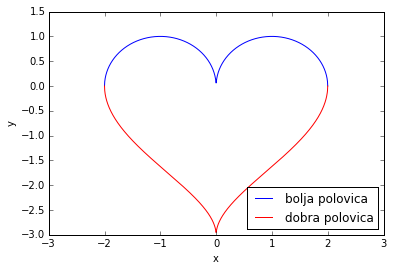

In [373]:
x = linspace(-2, 2, 1000)
plot(x, f1(x), 'b');
plot(x, f2(x), 'r');
axis([-3, 3, -3, 1.5])
xlabel('x')
ylabel('y')
legend(['bolja polovica', 'dobra polovica'], loc = 4);

## 7.

__(a)__ Učitajte skup podataka _Iris_. Ovaj skup podataka sadrži 150 instanci, 50 za svaku od tri klase (_Iris setosa_, _Iris virginica_ i _Iris versicolor_). Svaka instanca, to jest vektor, sadrži četiri značajke: širinu i dužinu latice te širinu i dužinu čašićnog listića. U polju _iris.data_ nalaze se instance, dok se u _iris.target_ nalaze oznake instanci (njihove stvarne klase).  Ispišite dimenzije polja instanci te polja njihovih stvarnih oznaka.

In [314]:
from sklearn import datasets

/usr/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [319]:
iris = datasets.load_iris()

In [321]:
shape(iris.data)

(150, 4)

In [322]:
shape(iris.target)

(150,)

__(b)__ Budući da ne možemo vizualizirati 4-dimenzijske podatke, iz svake instance izdvojite samo prve dvije značajke. Koristite indeksiranje poljem brojeva. Ispišite dimenzije dobivenog polja instanci.

In [330]:
iris2D = iris.data[:, [0, 1]]
shape(iris2D)

(150, 2)

__(c)__ Logičkim indeksiranjem razdvojite primjere za svaku od tri klase. Ispišite dimenzije dobivenih polja.

In [333]:
irisA = iris2D[iris.target == 0]
shape(irisA)

(50, 2)

In [334]:
irisB = iris2D[iris.target == 1]
shape(irisB)

(50, 2)

In [335]:
irisC = iris2D[iris.target == 2]
shape(irisC)

(50, 2)

__(d)__ Napišite kôd koji iscrtava četiri zasebna grafa (četiri podgrafa u 2x2 mreži), pri čemu tri grafa prikazuju instance određene klase (točke u 2-dimenzijskom prostoru), a četvrti ih prikazuje sve (u različitim bojama). Osigurajte da svi grafovi prikazuju isto područje grafa (npr. $x \in [4,9]$ i $y \in [1.5, 5]$).

Proučite kako se postavlja veličina glavnog okvira (u koji se smještaju podgrafovi) te ju postavite na 10x8.

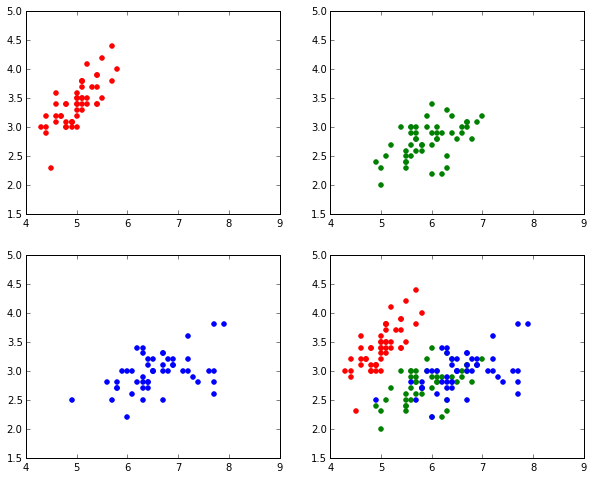

In [368]:
figure(figsize = (10, 8))
ax1 = subplot(221)
scatter(irisA[:, 0], irisA[:, 1], color = 'r')
subplot(222, sharex = ax1, sharey = ax1)
scatter(irisB[:, 0], irisB[:, 1], color = 'g')
subplot(223, sharex = ax1, sharey = ax1)
scatter(irisC[:, 0], irisC[:, 1], color = 'b')
subplot(224, sharex = ax1, sharey = ax1)
scatter(irisA[:, 0], irisA[:, 1], color = 'r')
scatter(irisB[:, 0], irisB[:, 1], color = 'g')
scatter(irisC[:, 0], irisC[:, 1], color = 'b');
axis([4, 9, 1.5, 5]);

## 8.

__(a)__ Napišite kôd koji u petlji iscrtava grafove normalnih distribucija definiranih s parametarima $\mu$ i $\sigma$:

* $\mu = 3$
* $\sigma \in [1, 5]$ (korak 1)

Dakle, generirat ćete pet grafova normalnih distribucija: $\mathcal{N}_{1}(\mu = 3, \sigma = 1)$, $\mathcal{N}_{2}(\mu = 3, \sigma = 2)$, ... , $\mathcal{N}_{1}(\mu = 3, \sigma = 5)$.

Grafove iscrtajte na istoj slici tako da su vidljive točke iz intervala $x \in [-15, 15]$ i $y \in [0, 0.5]$. Za svaki graf upotrijebite drugu boju. Za domenu koristite $[-50, 50]$ (uzorkujte 1000 točaka). Također napravite legendu u gornjem lijevom kutu koji će sve grafove nazvati onako kako su i u zadatku 
definirani ($\LaTeX$ kôd radi unutar znakovnih nizova koji definiraju oznaku unutar legende), npr. $\mathcal{N}_{1}(\mu = 3, \sigma = 5)$.


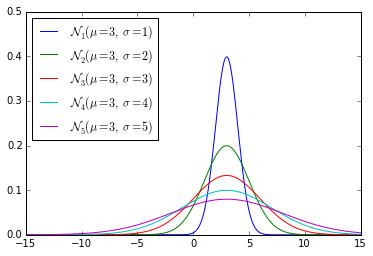

In [402]:
mu = 3
sigmas = range(1, 6)
distributions = [sp.stats.norm(mu, sigma) for sigma in sigmas]
x = linspace(-50, 50, 1000)
for dist in distributions:
    plot(x, dist.pdf(x))
axis([-15, 15, 0, 0.5]);
legend(['$\mathcal{N}_{' + str(sigma) + '}(\mu = ' + str(mu) + ',\, \sigma = '  + str(sigma) + ')$'
        for sigma in sigmas], loc=2);


__(b)__ Sada pretpostavite da imate zadanu distribuciju ocjena na nekom kolegiju koja se pokorava normalnoj distribuciji $\mathcal{N}_{G}(\mu = 62, \sigma = 13)$. Najprije je iscrtajte (nebitno kako), ali osigurajte da je domena $[0, 100]$ (raspon mogućih bodova na kolegiju) također uzorkovana u 1000 točaka.

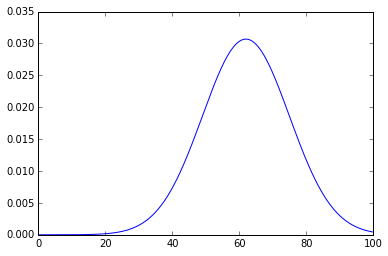

In [393]:
mu = 62
sigma = 13
dist = sp.stats.norm(mu, sigma)
x = linspace(0, 100, 1000)
plot(x, dist.pdf(x));

__(c)__ Međutim, vi polažete kolegij naknadno na roku, a profesoru se zaista ne da ispravljati vaš ispit. Kako bi tome doskočio, profesor često koristi tradicionalnu metodu stubišta (https://www.linkedin.com/pulse/20140414044726-2259773-a-guide-to-grading-exams) koju možemo aproksimirati nasumičnim odabirom broja iz distribucije bodova na ispitu. Napišite kôd koji iz distribucije bodova $\mathcal{N}_{G}$ dohvaća slučajnu vrijednost koja predstavlja vaš broj bodova (zaokružite bodove na cijeli broj).

In [401]:
int(dist.rvs(size = 1))

65

## 9.

Iscrtajte konture 2-dimenzijske Gausove distribucije $\mathcal{N} (\vec{\mu}, \Sigma)$ sa sljedećim parametrima:

* $\vec{\mu} = (1, 1)$
* $\Sigma = \begin{pmatrix}
1 & 1 \\
0.5 & 3 \\
\end{pmatrix}$

Za domenu uzmite $x_{1} \in [-1, 2]$ i $y_{2} \in [-2, 2]$.

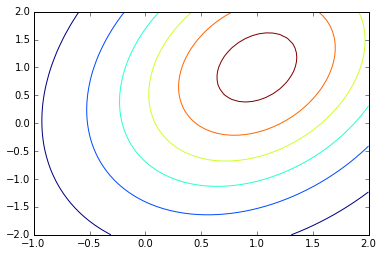

In [408]:
mu = [1, 1]
sigma = [[1, 1], [0.5, 3]]
multinorm = sp.stats.multivariate_normal(mu, sigma)
x = linspace(-1,2)
y = linspace(-2,2)
X, Y = meshgrid(x, y)
XY = dstack((X, Y))
contour(X, Y, multinorm.pdf(XY));